<h1>Import libraries<h1>

In [1]:
from Outliers_detection.Z_Score import *
from Outliers_detection.Inter_Quantile_Range import *
from Outliers_detection.Local_Outlier_Factor import *
from Outliers_imputation.Winsorization import *
from Outliers_imputation.Iterative_Imputer import *
from Plots.Preprocessing_plots import Preprocessing_plots
Plots_preprocessing = Preprocessing_plots()

<h2>Download data<h2>

In [2]:
data = pd.read_csv("../Data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


$\text{Divide our data into continous and categorical datasets.}$

In [3]:
categorical_features = ["sex", "children", "smoker", "region"]
categorical_data = data[categorical_features]
continous_data = data.drop(categorical_features, axis=1)

<h1>Methods for outliers detection<h1>

<h2>Boxplot and Histogram<h2>

$\text{First method is mainly for visualization.}$<p>
$\text{We will use boxplot and histogram to analyze each continous feature individually.}$

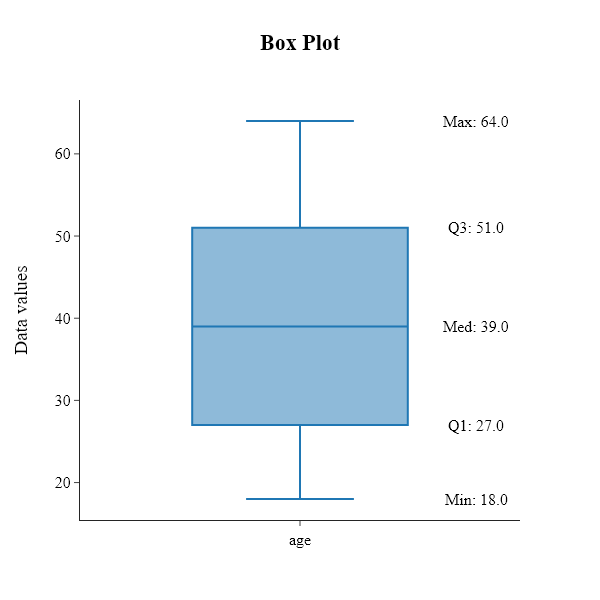

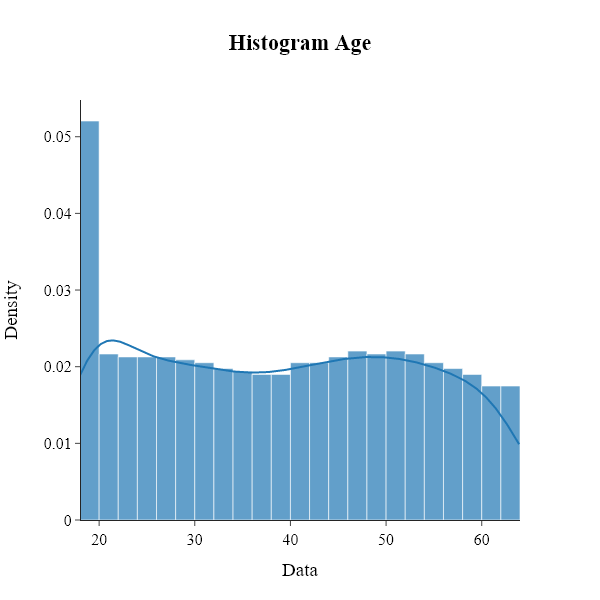

In [4]:
Plots_preprocessing.boxplot(data=continous_data["age"], with_annotation=True, name="age")
Plots_preprocessing.hist_plot_with_kde(data=continous_data["age"], name="age", bin_size=2)

$\text{The age variable is characterized by a uniform distribution.}$<p>
$\text{The exception is the first bar suggesting that the data may contain a lot of information about young/teenage people}$<p>
$\text{Based on the boxplot we can't see any outliers of this variable in the data.}$

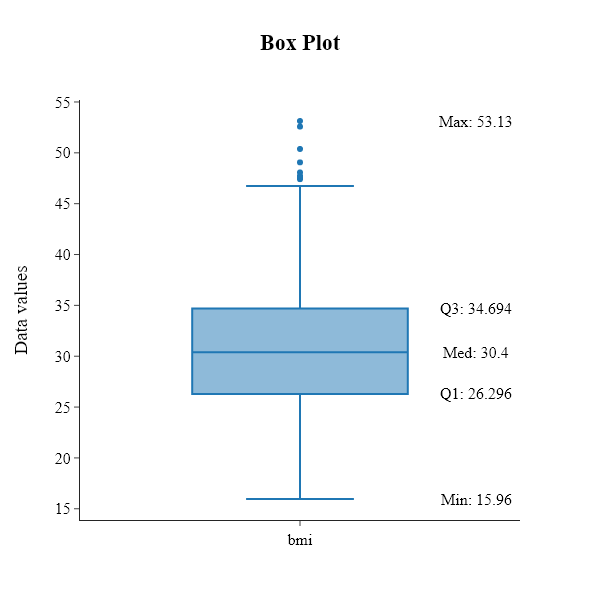

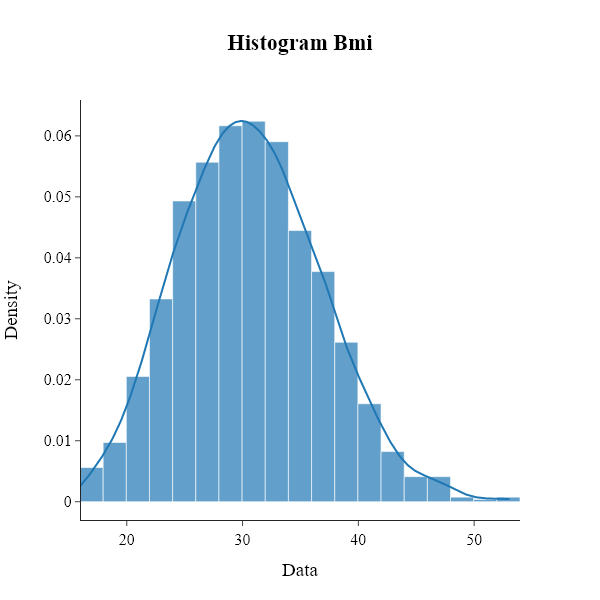

In [5]:
Plots_preprocessing.boxplot(data=continous_data["bmi"], with_annotation=True, name="bmi")
Plots_preprocessing.hist_plot_with_kde(data=continous_data["bmi"], name="bmi", bin_size=2)

$\text{The distribution of the BMI variable looks almost perfectly like a symmetrical normal distribution.}$<p>
$\text{On the histogram, however, we can observe a slight right skewness of the distribution.}$<p>
$\text{In addition, the box chart supports the above thesis, as there are outliers at the right tail.}$

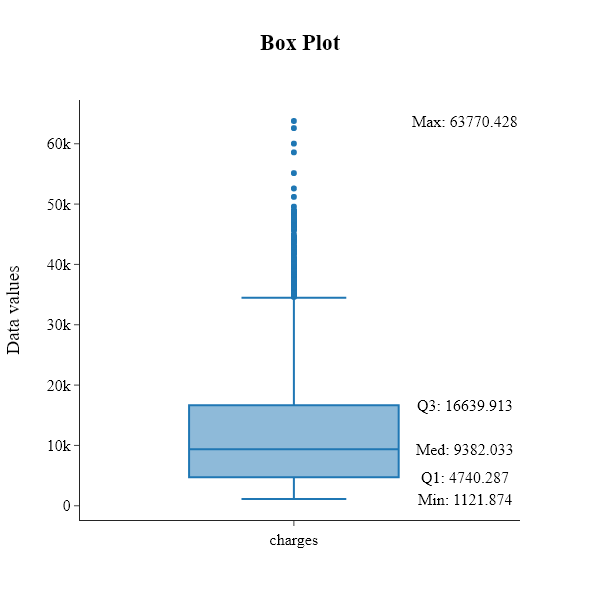

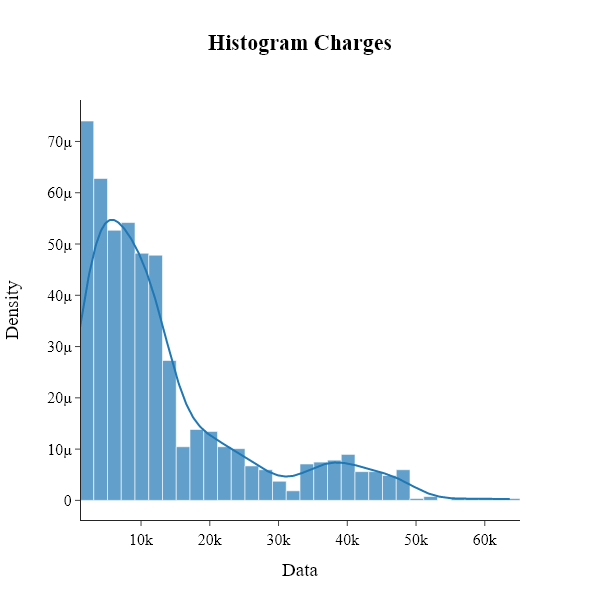

In [6]:
Plots_preprocessing.boxplot(data=continous_data["charges"], with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=continous_data["charges"], name="charges", bin_size=2000)

$\text{The distribution of the Charges variable resembles neither a normal nor a uniform distribution.}$<p>
$\text{The distribution of this feature is characterized by strong right skewness.}$<p>
$\text{The box chart confirms the presence of a large number of outliers.}$<p>
$\text{In the case of skewness, we can apply several transformations described in more detail here: }$ [Skewness]()

<h2>Z-Score<h2>

$\text{For continuous variables, if the case value satisfies the following inequalities:}$
$$X_{m,i}<-3\times\sigma_m\vee X_{m,i}>3\times\sigma_m$$
$\text{Then the observation } X_{m,i} \text{ is an outlier.}$<p>
$\text{The problem with this method is its default assumption about the normal distribution of the variable,}$<p>
$\text{which rarely occurs in real data (of course, the possibility to deal with this is the transformation using StandardScaler,}$<p>
$\text{verifying that outliers are present, and then inverting the transformation to the original distribution).}$

$\text{We will verify how Z-Score works for charge feature.}$

In [7]:
Z_score_transformer = Z_Score()
Z_score_transformer.fit(data=continous_data["charges"])
Z_score_transformer.find_outliers(data=continous_data["charges"])
transformed_data = Z_score_transformer.remove_outliers(data=continous_data["charges"])
print("Number of outliers in the data for charges feature based on Z-Score: {}".format(len(continous_data)-len(transformed_data)))
print("Ratio of number of observations in transformed data to original data: {}".format(len(transformed_data)/len(continous_data)))

Number of outliers in the data for charges feature based on Z-Score: 119
Ratio of number of observations in transformed data to original data: 0.9110612855007474


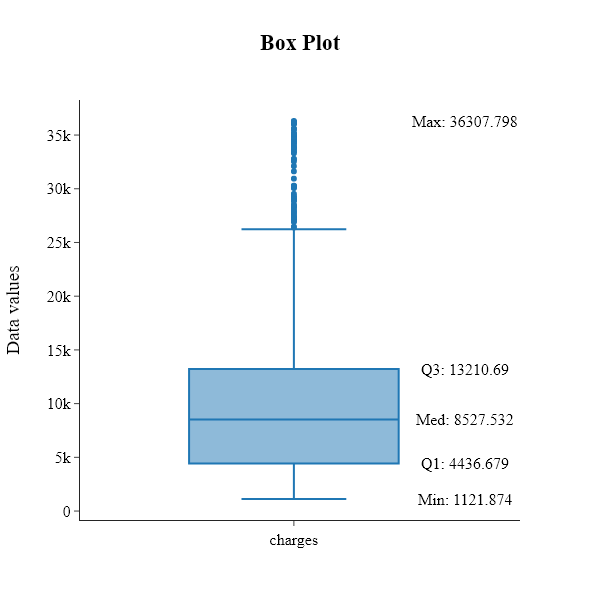

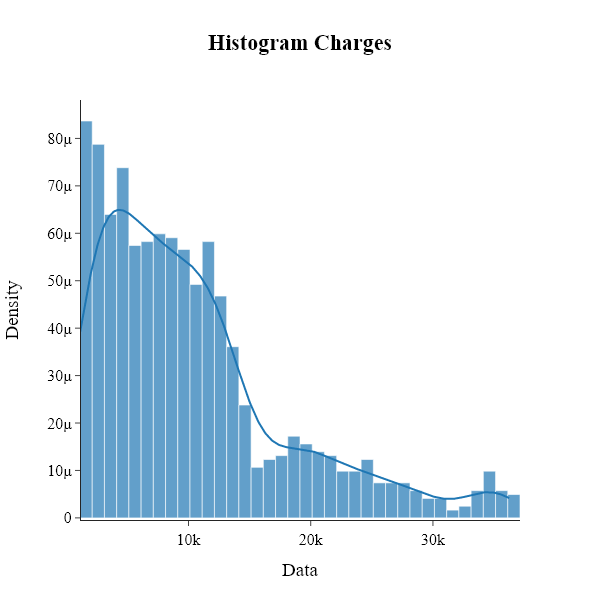

In [8]:
Plots_preprocessing.boxplot(data=transformed_data, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=transformed_data, name="charges", bin_size=1000)

$\text{As we can see, charges feature is still right-skewed, although we have removed almost 10\% of data.}$

<h2>Inter Quantile Range (IQR)<h2>

$\text{For continuous variables, if the case value satisfies the following inequalities:}$
$$X_{m,i}<Q_1-1.5\times IQR\vee X_{m,i}>Q_3+1.5\times IQR$$
$\text{Then the observation } X_{m,i} \text{ is an outlier.}$

$\text{We will verify how IQR works for charge feature.}$

In [9]:
IQR_transformer = Inter_Quantile_Range()
IQR_transformer.fit(data=continous_data["charges"])
IQR_transformer.find_outliers(data=continous_data["charges"])
transformed_data = IQR_transformer.remove_outliers(data=continous_data["charges"])
print("Number of outliers in the data for charges feature based on IQR: {}".format(len(continous_data)-len(transformed_data)))
print("Ratio of number of observations in transformed data to original data: {}".format(len(transformed_data)/len(continous_data)))

Number of outliers in the data for charges feature based on IQR: 139
Ratio of number of observations in transformed data to original data: 0.8961136023916293


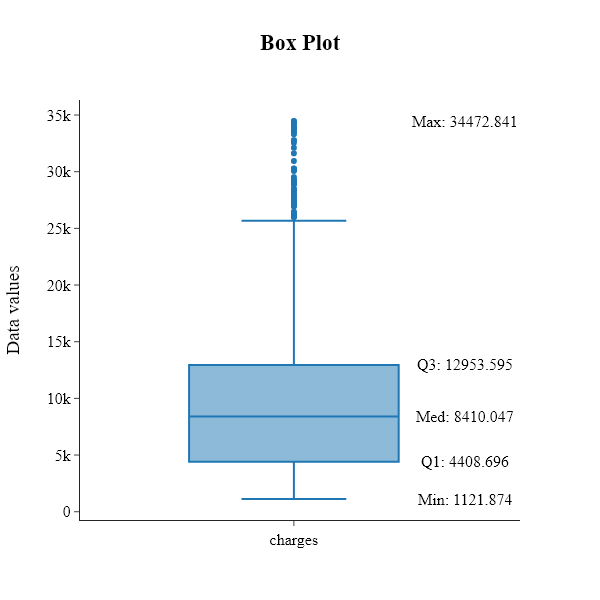

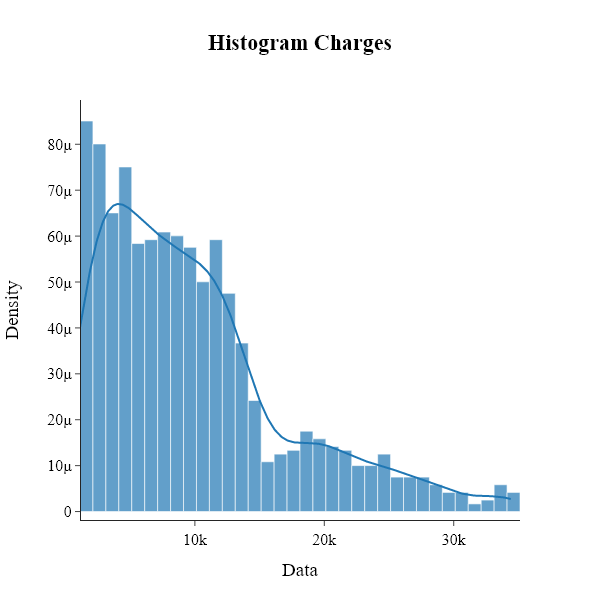

In [10]:
Plots_preprocessing.boxplot(data=transformed_data, with_annotation=True, name="charges")
Plots_preprocessing.hist_plot_with_kde(data=transformed_data, name="charges", bin_size=1000)

$\text{The results are very simmilar to Z-Score.}$<p>
$\text{IQR eliminated a bit more outliers, but there is still a significant amount of them in the dataset}$

<h2>Bar and Pie charts<h2>

$\text{For categorical data the best option is to visualize it with Bar or Pie chart to find out about frequency of each category.}$

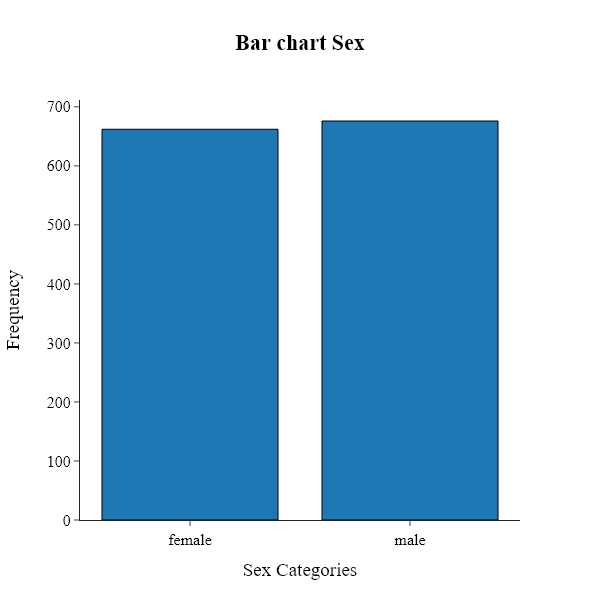

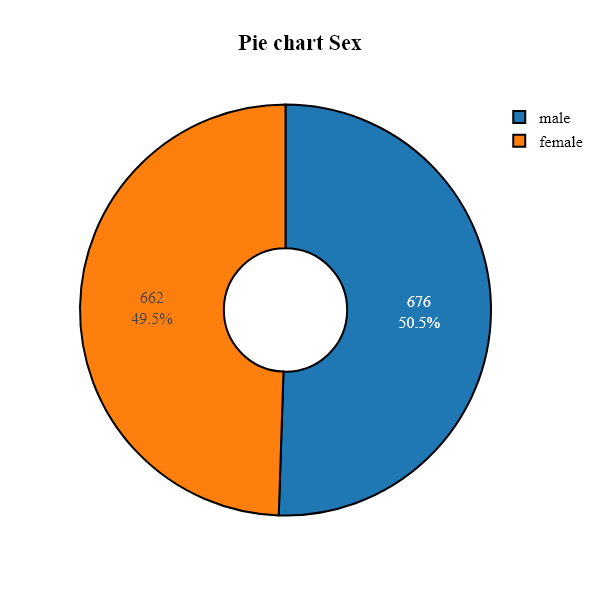

In [11]:
Plots_preprocessing.barplot(data=categorical_data["sex"], name="sex")
Plots_preprocessing.pie_chart(data=categorical_data["sex"], name="sex")

In [12]:
categorical_data

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


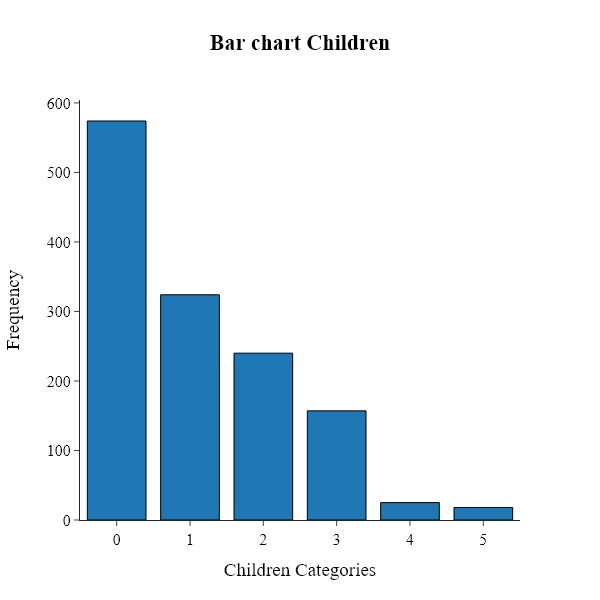

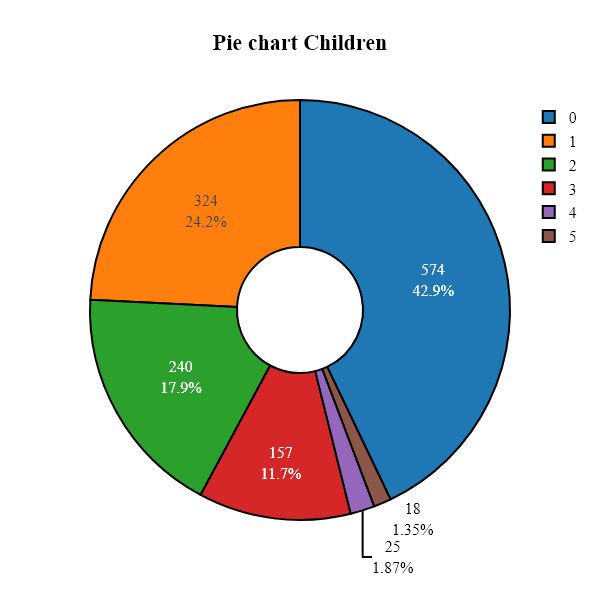

In [13]:
Plots_preprocessing.barplot(data=categorical_data["children"], name="children")
Plots_preprocessing.pie_chart(data=categorical_data["children"], name="children")

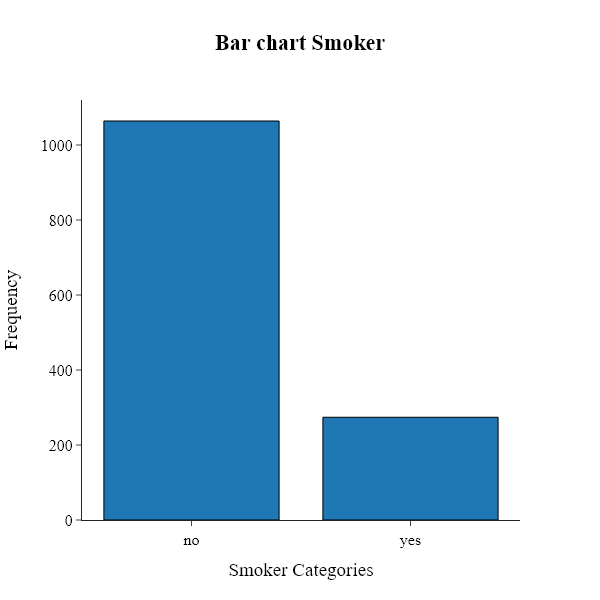

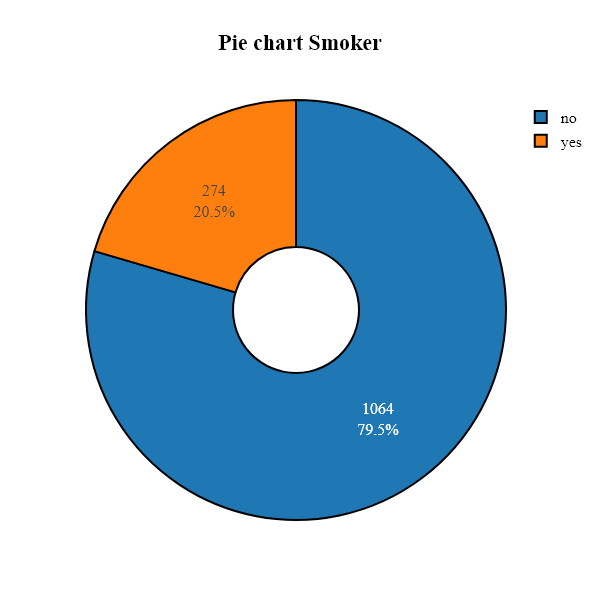

In [14]:
Plots_preprocessing.barplot(data=categorical_data["smoker"], name="smoker")
Plots_preprocessing.pie_chart(data=categorical_data["smoker"], name="smoker")

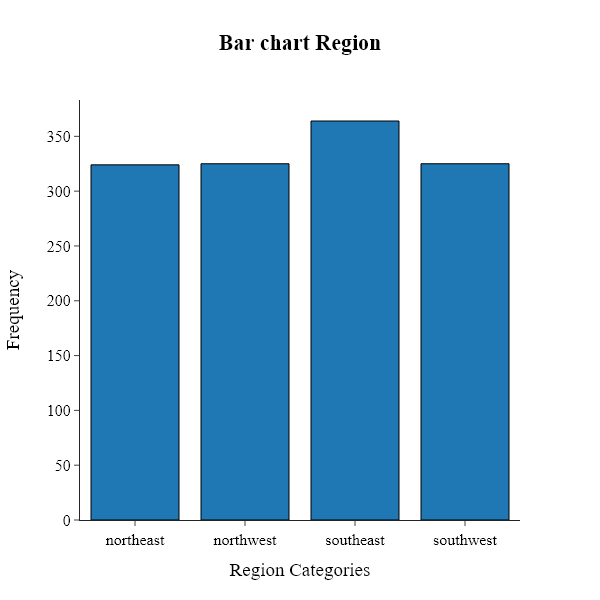

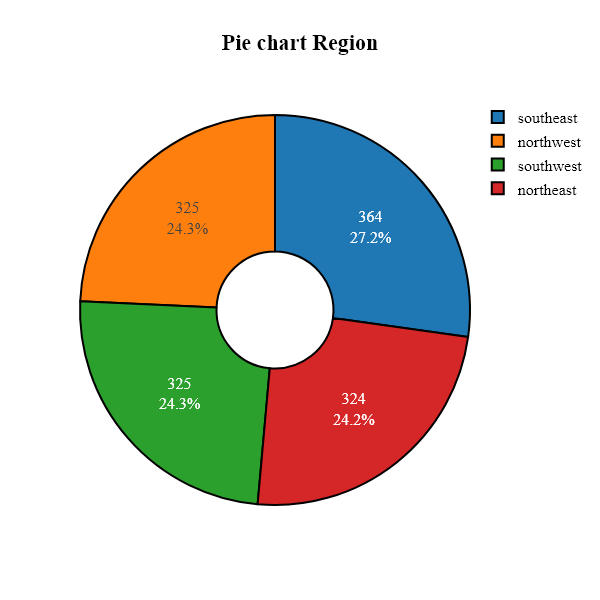

In [15]:
Plots_preprocessing.barplot(data=categorical_data["region"], name="region")
Plots_preprocessing.pie_chart(data=categorical_data["region"], name="region")

$\text{For categorical variables, it is assumed that if a category occurs less frequently than } 0.01×N,$<p>
$\text{then observations taking the category can be considered as outliers.}$<p>
$\text{The least numerous category is: 5 for children. However it is still a little more than 1 \% of the data.}$

<h2>Local Outlier Factor<h2>

$\text{To identify potential outliers, follow these steps:}$<p><br>
$1. \text{ Determining the distance between observations, and then assigning each of them to its k-nearest neighbors.}$<p>
$\text{More information on KNN can be found here: }$ [K Nearest Neighbors](https://github.com/kvbiii/ML_Algorithms_from_scratch/blob/main/KNN/KNN_example.ipynb)<p><br>
$2. \text{ Calculate Reachability Density (RD), which is the distance between an observation and its farthest neighbor:}$
$$RD\left(X_i\right)=\max{\left(distance\left(X_i,X_j\in N_k(X_i)\right)\right)}$$
$\text{Where: } N_k (X_i) \text{ – } k \text{ nearest neighbors of observation } i.$<p><br>
$3. \text{ Calculation of Local Reachability Density (LRD), which is the inverse average of the RD between an observation and its neighbors:}$
$$LRD\left(X_i\right)=\frac{\left|\left|N_k\left(X_i\right)\right|\right|}{\sum_{X_j\in N_k\left(X_i\right)} D i s t a n c e\left(X_i,\ X_j\right)}$$
$\text{Where: } \left|\left|N_k\left(X_i\right)\right|\right| \text{ - the number of nearest neighbors.}$<p>
$\text{The LRD tells us how far an observation is from a "cluster" of points.}$<p><br>
$4. \text{ Determination of the Local Outlier Factor (LOF):}$
$$LOF\left(X_i\right)=\frac{\sum_{X_j\in N_k\left(X_i\right)} L R D\left(X_j\right)}{\left|\left|N_k\left(X_i\right)\right|\right|}\times\frac{1}{LRD\left(X_i\right)}$$
$\text{If } X_i \text{ is not an outlier, then the average of all LRDs is approximately equal to the LRD of a given observation (the cluster of points is close), i.e. } LOF\left(X_i\right)\approx1.$<p>
$\text{If } X_i \text{ is an outlier, then } LRD\left(X_i\right) \text{ is low because the distance to neighbors will be large, and if these neighbors form a cluster, their average LRD will be large.}$<p>
$\text{Thus, } LOF\left(X_i\right) \text{ will take high values.}$<p><br>
$\text{The advantage of this tool is the possibility of examining the general outliers of points - it is a multivariate analysis.}$<p> 
$\text{In the previous ones, we focused on each variable individually, but thanks to this method, you can verify "global" outliers.}$<p>
$\text{However, the disadvantages will be the problem with the interpretation of the LOF statistics and the difficulty of choosing the right number of neighbors.}$<p>
$\text{In addition, there is no predetermined cut-off threshold at which observations should be considered outliers.}$<p>

In [16]:
data_lof = data.copy()
encoder = OrdinalEncoder()
data_lof[categorical_features] = encoder.fit_transform(data_lof[categorical_features])

In [17]:
LOF = Local_Outlier_Factor(n_neighbors=20, distance="euclidean", random_state=17)
LOF.fit(data_lof)

$\text{We can visualize distribution od LOF with histogram.}$

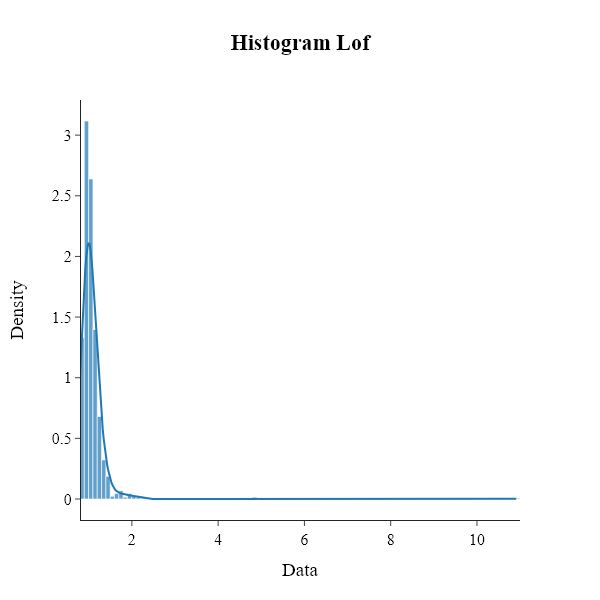

In [18]:
Plots_preprocessing.hist_plot_with_kde(data=LOF.local_outlier_factor_, name="LOF", bin_size=0.1)

$\text{It looks like LOF statistic distribution is right-side skewed.}$<p>
$\text{observations that we consider outliers are those for which } LOF > 95th \ percentile$

In [19]:
LOF_indices_of_outliers = LOF.find_indices_of_outliers(local_outlier_factor_to_compared=LOF.local_outlier_factor_)

In [20]:
print("Number of outliers in the data for charges feature based on LOF: {}".format(len(LOF_indices_of_outliers)))
print("Ratio of number of observations in transformed data to original data: {}".format(len(LOF_indices_of_outliers)/len(data_lof)))

Number of outliers in the data for charges feature based on LOF: 67
Ratio of number of observations in transformed data to original data: 0.05007473841554559


$\text{Now let's combine all the methods and try to determine the observations that were considered as outliers for the methods: Z-Score, IQR and LOF}$

In [21]:
intersection_of_LOF_and_Z_Score = np.intersect1d(LOF_indices_of_outliers, Z_score_transformer.indices_of_outliers_)
indices_of_outliers = np.intersect1d(intersection_of_LOF_and_Z_Score, IQR_transformer.indices_of_outliers_)
indices_of_outliers

array([  34,  488,  543,  577,  819, 1062, 1146, 1230, 1241, 1300],
      dtype=int64)

<h1>Methods for outliers transformation<h1>

<h2>Removal of observation from data<h2>

$\text{Only in thoroughlt justified cases.}$

<h2>Data imputaion - winsorization<h2>

$\text{It consists in modifying each "small outlier" as the nth percentile, and each "large outlier" as (1-n) - this percentile (usually n=5).}$

<h2>Binning<h2>

$\text{Especially in the case of categorical variables, changing all those low frequent categories into "Other".}$

<h2>Scaling/Transforming<h2>

$\text{Using the scalers defined }$ [here](https://github.com/kvbiii/Preprocessing/blob/main/Scalers/Scalers_test.ipynb) $\text{ or in the case of skewness, the transformations described }$ [here](https://github.com/kvbiii/Preprocessing/blob/main/Data_Cleaning/Skewness/Skewness_example.ipynb).<p>
$\text{Some of these tools are able to limit the role of outliers very well.}$

<h2>Model imputation<h2>

$\text{Similar to missing value imputation, various machine learning algorithms can be used to transform outliers.}$

<h1>Comparision of outliers transformation<h1>

$\text{Suppose that we would like to predict whether the person in the data is smoker (1) or not (0).}$<p>
$\text{We will compare base model (without any imputation) with three different methods:}$<p>
$\text{- Continous features scaled with StandardScaler}$<p>
$\text{- Continous features transformed with BoxCox Transformation}$<p>
$\text{- Winsorization with 5th percentile for continous data and 5\% for categorical.}$<p>
$\text{- Outliers detected by LOF will be removed from model.}$<p>
$\text{- Outliers detected by Z-Score and IQR for continous data will be imputed by Linear Regression.}$

$\text{Firstly, let's preprocess data a bit.}$

In [22]:
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])

In [23]:
X = data.drop("smoker", axis=1)
y = data["smoker"]

$\text{We have to remember that all preprocessing steps are done AFTER splitting data!}$<p>
$\text{Untill model evaluation we don't know what is test dataset.}$

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

<h2>Base model<h2>

In [25]:
X_train_base_model = X_train.copy()
X_test_base_model = X_test.copy()

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=17)
model.fit(X_train_base_model, y_train)
y_pred_train = model.predict(X_train_base_model)
y_prob_train = model.predict_proba(X_train_base_model)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train, y_pred_train), 4), np.round(roc_auc_score(y_train, y_prob_train), 4)))
y_pred_test = model.predict(X_test_base_model)
y_prob_test = model.predict_proba(X_test_base_model)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test, y_pred_test), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.8813; AUC Score: 0.9837
TRAIN: Balanced accuracy score: 0.7774; AUC Score: 0.987


<h2>StandardScaler<h2>

In [27]:
class Standard_Scaler():
    def __init__(self):
        self.fit_used = False

    def fit(self, X):
        X = self.check_X(X=X)
        X = self.check_for_object_columns(X=X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.fit_used = True
    
    def fit_transform(self, X):
        X = self.check_X(X=X)
        X = self.check_for_object_columns(X=X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.fit_used = True
        return (X-self.mean)/self.std
    
    def transform(self, X):
        self.check_fit(fit_used=self.fit_used)
        X = self.check_X(X=X)
        X = self.check_for_object_columns(X=X)
        return (X-self.mean)/self.std
    
    def inverse_transform(self, X):
        self.check_fit(fit_used=self.fit_used)
        return X*self.std.T+self.mean.T
    
    def check_X(self, X):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, pd.Series) and not isinstance(X, np.ndarray) and not torch.is_tensor(X):
            raise TypeError('Wrong type of X. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        X = np.array(X)
        if(X.ndim == 1):
            X = X[None, :]
        return X
    
    def check_for_object_columns(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        if X.select_dtypes(include=np.number).shape[1] != X.shape[1]:
            raise TypeError('Your data contains object or string columns. Numeric data is obligated.')
        return np.array(X)
    
    def check_fit(self, fit_used):
        if fit_used == False:
            raise AttributeError('Standard_Scaler has to be fitted first.')

In [28]:
categorical_features.remove("smoker")
continous_data_train = X_train.drop(categorical_features, axis=1)
continous_data_test = X_test.drop(categorical_features, axis=1)

In [29]:
scaler = Standard_Scaler()
X_train_continous_scaled = scaler.fit_transform(continous_data_train)
X_test_continous_scaled = scaler.transform(continous_data_test)

In [30]:
X_train_standard_scaler = np.concatenate([X_train_continous_scaled, X_train[categorical_features]], axis=1)
X_test_standard_scaler = np.concatenate([X_test_continous_scaled, X_test[categorical_features]], axis=1)

In [31]:
model = LogisticRegression(random_state=17)
model.fit(X_train_standard_scaler, y_train)
y_pred_train = model.predict(X_train_standard_scaler)
y_prob_train = model.predict_proba(X_train_standard_scaler)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train, y_pred_train), 4), np.round(roc_auc_score(y_train, y_prob_train), 4)))
y_pred_test = model.predict(X_test_standard_scaler)
y_prob_test = model.predict_proba(X_test_standard_scaler)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test, y_pred_test), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.9206; AUC Score: 0.986
TRAIN: Balanced accuracy score: 0.8875; AUC Score: 0.9917


$\text{As we can see there is a lot of improvement for train and test set scores!}$

<h2>Box Cox Transformation<h2>

In [32]:
class Skewness:
    def __init__(self):
        pass

    def check_data(self, data):
        if not isinstance(data, pd.DataFrame) and not isinstance(data, pd.Series) and not isinstance(data, np.ndarray) and not torch.is_tensor(data):
            raise TypeError('Wrong type of data. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        data = np.array(data)
        if(data.ndim == 2):
            data = data.squeeze()
        return data
    
    def check_for_object_columns(self, data):
        data = pd.DataFrame(data)
        if data.select_dtypes(include=np.number).shape[1] != data.shape[1]:
            raise TypeError('Your data contains object or string columns. Numeric data is obligated.')
        return np.array(data)

    def calculate_skewness(self, data):
        data = self.check_data(data=data)
        data = self.check_for_object_columns(data=data)
        return np.sum((data-np.mean(data))**3)/((data.shape[0]-1)*np.std(data)**3)

    def logarithmic_transformation(self, data):
        data = self.check_data(data=data)
        data = self.check_for_object_columns(data=data)
        return np.log(data)
    
    def square_root_transformation(self, data):
        data = self.check_data(data=data)
        data = self.check_for_object_columns(data=data)
        return np.sqrt(data)
    
    def box_cox_transformation(self, data, reg_lambda=0):
        data = self.check_data(data=data)
        data = self.check_for_object_columns(data=data)
        if(reg_lambda==0):
            return self.logarithmic_transformation(data=data)
        else:
            return (data**reg_lambda-1)/reg_lambda

$\text{Firstly, using scipy.stats we will find out what the optimal } \lambda \text{ value is for each feature in continous train data.}$<p>
$\text{After that we can transform each feature in train and test dataset.}$

In [33]:
from scipy.stats import boxcox
Skewness = Skewness()
continous_data_train = X_train.drop(categorical_features, axis=1)
continous_data_test = X_test.drop(categorical_features, axis=1)
for feature in continous_data_train.columns:
    _, optimal_lambda = boxcox(continous_data_train[feature])
    continous_data_train[feature] = Skewness.box_cox_transformation(data=continous_data_train[feature], reg_lambda=optimal_lambda)
    continous_data_test[feature] = Skewness.box_cox_transformation(data=continous_data_test[feature], reg_lambda=optimal_lambda)

In [34]:
X_train_box_cox = np.concatenate([continous_data_train, X_train[categorical_features]], axis=1)
X_test_box_cox = np.concatenate([continous_data_test, X_test[categorical_features]], axis=1)

In [35]:
model = LogisticRegression(random_state=17)
model.fit(X_train_box_cox, y_train)
y_pred_train = model.predict(X_train_box_cox)
y_prob_train = model.predict_proba(X_train_box_cox)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train, y_pred_train), 4), np.round(roc_auc_score(y_train, y_prob_train), 4)))
y_pred_test = model.predict(X_test_box_cox)
y_prob_test = model.predict_proba(X_test_box_cox)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test, y_pred_test), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.9799; AUC Score: 0.9838
TRAIN: Balanced accuracy score: 0.9787; AUC Score: 0.993


$\text{We can see that there is even more improvement!}$

<h2>Winsorization<h2>

In [36]:
Winsorization_Transformer = Winsorization(percentile=0.05, percentage=0.05)
X_train_winsorization= X_train.copy()
X_test_winsorization = X_test.copy()
for feature in X_train.columns:
    if(feature in categorical_features):
        X_train_winsorization[feature] = Winsorization_Transformer.fit_transform(data=X_train_winsorization[feature], feature_type="categorical")
        X_test_winsorization[feature] = Winsorization_Transformer.transform(data=X_test_winsorization[feature], feature_type="categorical")
    else:
        X_train_winsorization[feature] = Winsorization_Transformer.fit_transform(data=X_train_winsorization[feature], feature_type="continous")
        X_test_winsorization[feature] = Winsorization_Transformer.transform(data=X_test_winsorization[feature], feature_type="continous")

In [37]:
model = LogisticRegression(random_state=17)
model.fit(X_train_winsorization, y_train)
y_pred_train = model.predict(X_train_winsorization)
y_prob_train = model.predict_proba(X_train_winsorization)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train, y_pred_train), 4), np.round(roc_auc_score(y_train, y_prob_train), 4)))
y_pred_test = model.predict(X_test_winsorization)
y_prob_test = model.predict_proba(X_test_winsorization)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test, y_pred_test), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.8931; AUC Score: 0.9846
TRAIN: Balanced accuracy score: 0.8437; AUC Score: 0.9883


$\text{Winsorization also improved the results, but they were not event close to Box Cox Transformation.}$

<h2>Local Outlier Factor<h2>

$\text{In this approach, it is very important not to violate the assumption of not knowing the test data.}$<p>
$\text{An approach that will be consistent with this is:}$<p>
$\text{- Training and finding the } local\_outlier\_factor \text{ separately for the training and test sets}$<p>
$\text{- Removing observations from the training set for which } LOF\_Train > 95th \text{ percentile of } LOF\_Train$<p>
$\text{- Removing observations from the test set for which } LOF\_Test > 95th \text{ percentile of } LOF\_Train$<p>
$\text{This modifies the test set based on the training set.}$<p>
$\text{This can be compared to transforming the test data using StandardScaler and the learned mean and std on the training set.}$

In [38]:
LOF_train = Local_Outlier_Factor(n_neighbors=20, distance="euclidean", random_state=17)
LOF_train.fit(X_train)
LOF_test = Local_Outlier_Factor(n_neighbors=20, distance="euclidean", random_state=17)
LOF_test.fit(X_test)

In [39]:
indices_of_outliers_train = LOF_train.find_indices_of_outliers(local_outlier_factor_to_compared=LOF_train.local_outlier_factor_)
indices_of_outliers_test = LOF_test.find_indices_of_outliers(local_outlier_factor_to_compared=LOF_test.local_outlier_factor_)

In [40]:
X_train_LOF = X_train.drop(X_train.index[indices_of_outliers_train])
y_train_transformed = y_train.drop(y_train.index[indices_of_outliers_train])
X_test_LOF = X_test.drop(X_test.index[indices_of_outliers_test])
y_test_transformed = y_test.drop(y_test.index[indices_of_outliers_test])

In [41]:
model = LogisticRegression(random_state=17, max_iter=1000)
model.fit(X_train_LOF, y_train_transformed)
y_pred_train = model.predict(X_train_LOF)
y_prob_train = model.predict_proba(X_train_LOF)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train_transformed, y_pred_train), 4), np.round(roc_auc_score(y_train_transformed, y_prob_train), 4)))
y_pred_test = model.predict(X_test_LOF)
y_prob_test = model.predict_proba(X_test_LOF)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test_transformed, y_pred_test), 4), np.round(roc_auc_score(y_test_transformed, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.8829; AUC Score: 0.9844
TRAIN: Balanced accuracy score: 0.8332; AUC Score: 0.9892


$\text{Also improvement, but scores are the worst.}$<p>
$\text{Perhaps instead of removing the outliers, we should have been looked more closely at these observations and modify selected variables, instead of deleting entire observations?}$

<h2>Z-Score, IQR and Model Imputation<h2>

In [42]:
Z_score_transformer = Z_Score()
IQR_transformer = Inter_Quantile_Range()
train_outliers_mask = np.zeros(shape=X_train.shape, dtype=bool)
test_outliers_mask = np.zeros(shape=X_test.shape, dtype=bool)
for feature_idx, feature in enumerate(X.columns):
    if(feature not in categorical_features):
        Z_score_transformer.fit(data=X_train[feature])
        Z_score_train_outliers = Z_score_transformer.find_outliers(data=X_train[feature])
        Z_score_test_outliers = Z_score_transformer.find_outliers(data=X_test[feature])
        IQR_transformer.fit(data=X_train[feature])
        IQR_train_outliers = IQR_transformer.find_outliers(data=X_train[feature])
        IQR_test_outliers = IQR_transformer.find_outliers(data=X_test[feature])
        train_outliers = np.intersect1d(Z_score_train_outliers, IQR_train_outliers)
        test_outliers = np.intersect1d(Z_score_test_outliers, IQR_test_outliers)
        train_outliers_mask[train_outliers, feature_idx] = True
        test_outliers_mask[test_outliers, feature_idx] = True

$\text{In model imputation method, it is important to ensure that the dependent variable is not used as a predictor to impute missing values for the selected independent variable.}$<p>
$\text{If we did so, then the data leakage would occur.}$

In [43]:
from sklearn.ensemble import RandomForestRegressor
Imputer = Iterative_Outliers_Imputer(estimator=RandomForestRegressor(random_state=17), initial_strategy="median", imputation_order="ascending", random_state=17)
X_train_model_imputation = Imputer.fit_transform(X=X_train, outliers_mask=train_outliers_mask)
X_test_model_imputation = Imputer.transform(X_train=X_train_model_imputation, X_test=X_test, outliers_mask=test_outliers_mask)

In [44]:
model = LogisticRegression(random_state=17, max_iter=1000)
model.fit(X_train_model_imputation, y_train)
y_pred_train = model.predict(X_train_model_imputation)
y_prob_train = model.predict_proba(X_train_model_imputation)[:,1]
print("TRAIN: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_train, y_pred_train), 4), np.round(roc_auc_score(y_train, y_prob_train), 4)))
y_pred_test = model.predict(X_test_model_imputation)
y_prob_test = model.predict_proba(X_test_model_imputation)[:,1]
print("TEST: Balanced accuracy score: {}; AUC Score: {}".format(np.round(balanced_accuracy_score(y_test, y_pred_test), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

TRAIN: Balanced accuracy score: 0.7545; AUC Score: 0.7804
TRAIN: Balanced accuracy score: 0.8224; AUC Score: 0.8621


$\text{Well, it seems like Iterative Imputer did not improve scores much...}$

<h1>Choosing best method<h1>

$\text{To choose best method even not based on scores (because in real machine learning process we should not base our model on test score),}$<p>
$\text{we can verify it using skewness of LOF statistic.}$<p>
$\text{For example, the best method is one for which the skewness of the LOF statistic in the dataset was the smallest.}$

In [45]:
def calculate_skewness(data):
    return np.sum((data-np.mean(data))**3)/((data.shape[0]-1)*np.std(data)**3)

<h3>Base model<h3>

In [46]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_base_model)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_base_model)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 8.086320478390306; TEST: 1.8618809876529425


<h3>StandardScaler<h3>

In [47]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_standard_scaler)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_standard_scaler)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 1.572171283684016; TEST: 0.9710791516058049


<h3>Box Cox Transformation<h3>

In [48]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_box_cox)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_box_cox)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 1.5207977893059828; TEST: 0.816045258384653


<h3>Winsorization<h3>

In [49]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_winsorization)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_winsorization)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 13.554462202793173; TEST: 1.7532287801741473


<h3>Local Outlier Factor<h3>

In [50]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_LOF)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_LOF)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 18.258592728071502; TEST: 1.5458421529032742


<h3>Z-Score, IQR, Model Imputation<h3>

In [51]:
LOF_train = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_train.fit(X_train_model_imputation)
LOF_test = Local_Outlier_Factor(n_neighbors=30, distance="euclidean", random_state=17)
LOF_test.fit(X_test_model_imputation)
print("Skewness of Local Outlier factor for TRAIN: {}; TEST: {}".format(calculate_skewness(LOF_train.local_outlier_factor_), calculate_skewness(LOF_test.local_outlier_factor_)))

Skewness of Local Outlier factor for TRAIN: 5.350090540354344; TEST: 4.064735491341266


$\text{It appears that as with the results of the balanced accuracy score and roc auc:}$<p>
$\text{the best method of modifying outliers turned out to be Box Cox.}$